# Importing and preparing rental apartments data

## Libraries and settings

In [1]:
# Libraries
import os  # Bietet Funktionen zur Interaktion mit dem Betriebssystem
import re  # Bietet Unterstützung für reguläre Ausdrücke
import fnmatch  # Bietet Unterstützung für Unix-Dateinamensmuster
import datetime  # Stellt Klassen zur Manipulation von Datums- und Zeitangaben bereit
import numpy as np  # Bietet Unterstützung für große, mehrdimensionale Arrays und Matrizen
import pandas as pd  # Bietet Datenstrukturen und Datenanalysetools für den Umgang mit strukturierten Daten

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_03


## Importing data

In [2]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_zuerich.csv', sep=',', encoding='utf-8')

# Get number of rows and columns
df.shape

(1008, 7)

## Count number of rows and columns in the data frame

In [3]:
# Dimension (rows, columns)
print('Dimension:', df.shape)

# Number of rows
print('Number of rows:', df.shape[0])

# Number of columns
print('Number of columns:', df.shape[1])

Dimension: (1008, 7)
Number of rows: 1008
Number of columns: 7


## Get data types (raw-format from web scraping)

In [4]:
# Get data types (note that in pandas, a string is referred to as 'object')
df.dtypes

web-scraper-order        object
web-scraper-start-url    object
rooms_area_price_raw     object
address_raw              object
price_raw                object
description_raw          object
text_raw                 object
dtype: object

## Extract and save relevant information from raw data using regular expressions (regex)

### Extract number of rooms

In [5]:
# Extract values from 'rooms_area_price_raw' strings
rooms = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall('(.*)Zimmer', i)
    try:
        d2 = d1[0].strip().replace(',', '.')
    except:
        d2 = None
    rooms.append(d2)

# Save as new variable in the pandas data frame
df['rooms'] = pd.Series(rooms, dtype="float64")
    
# Print first 5 values
print(df['rooms_area_price_raw'].head(5), '\n')
print(df['rooms'].head(5), '\n')

0      3 Zimmer, 49 m², CHF 1441.—
1    3,5 Zimmer, 65 m², CHF 1850.—
2                19 m², CHF 2686.—
3      2 Zimmer, 54 m², CHF 4853.—
4      2 Zimmer, 49 m², CHF 4335.—
Name: rooms_area_price_raw, dtype: object 

0    3.0
1    3.5
2    NaN
3    2.0
4    2.0
Name: rooms, dtype: float64 



### Extract living area

In [6]:
# Extract values from 'rooms_area_price_raw' strings
area = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall('Zimmer, (.*)m²', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    area.append(d2)

# Save as new variable in the pandas data frame
df['area'] = pd.Series(area, dtype="float64")

# Print first 5 values
print(df['rooms_area_price_raw'].head(5), '\n')
print(df['area'].head(5), '\n')

0      3 Zimmer, 49 m², CHF 1441.—
1    3,5 Zimmer, 65 m², CHF 1850.—
2                19 m², CHF 2686.—
3      2 Zimmer, 54 m², CHF 4853.—
4      2 Zimmer, 49 m², CHF 4335.—
Name: rooms_area_price_raw, dtype: object 

0    49.0
1    65.0
2     NaN
3    54.0
4    49.0
Name: area, dtype: float64 



### Extract rental price

In [7]:
# Extract values from 'price_raw' strings
price = []
for i in df['price_raw']:
    d1 = re.findall('[0-9]+', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="float64")

# Print first 5 values
print(df['price_raw'].head(), '\n')
print(df['price'].head())

0    CHF 1441.—
1    CHF 1850.—
2    CHF 2686.—
3    CHF 4853.—
4    CHF 4335.—
Name: price_raw, dtype: object 

0    1441.0
1    1850.0
2    2686.0
3    4853.0
4    4335.0
Name: price, dtype: float64


## Create additional variables from the apartment's descriptions

### Change strings in 'description_raw' ad 'text_raw' to uppercase 

In [8]:
# Change strings to uppercase 
df['description_raw'] = df['description_raw'].str.upper()
print(df['description_raw'].head(10), '\n')

df['text_raw'] = df['text_raw'].str.upper()
print(df['text_raw'].head(10))

0                   «GEMÜTLICHE WOHNUNG IM GRÜNEN»
1    «ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»
2                «STUDIO APARTMENT JUNIOR BALCONY»
3             «2 BEDROOM APARTMENT SENIOR BALCONY»
4             «2 BEDROOM APARTMENT JUNIOR TERRACE»
5                «STUDIO APARTMENT SENIOR TERRACE»
6             «1 BEDROOM APARTMENT JUNIOR TERRACE»
7                     «2 BEDROOM APARTMENT JUNIOR»
8                        «STUDIO APARTMENT JUNIOR»
9                     «1 BEDROOM APARTMENT JUNIOR»
Name: description_raw, dtype: object 

0    3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 86...
1    3,5 ZIMMER, 65 M², CHF 1850.—ZÜRCHERSTRASSE 1,...
2    19 M², CHF 2686.—CRAMERSTRASSE 8-12, 8004 ZÜRI...
3    2 ZIMMER, 54 M², CHF 4853.—CRAMERSTRASSE 8-12,...
4    2 ZIMMER, 49 M², CHF 4335.—ROTACHSTRASSE 33, 8...
5    34 M², CHF 3205.—BINZMÜHLESTR. 50, 8050 ZÜRICH...
6    25 M², CHF 3308.—ROTACHSTRASSE 33, 8003 ZÜRICH...
7    43 M², CHF 4241.—MILITÄRSTRASSE 24, 8004 ZÜRIC...
8    19 M²,

### Calculate lenght of strings in 'description_raw' and 'text_raw'

In [9]:
# Show first item of variable 'description_raw'
for i in range(0, 1):   
    print(df['description_raw'][i])

print("************************************")

# Lenght of the strings in 'description_raw'
df['description_raw_len'] = df['description_raw'].str.len()
print(df['description_raw_len'], '\n')
print("************************************")

# Show first item of variable 'text_raw'
print(df['text_raw'][0])
print("************************************")

# Lenght of the strings in 'text_raw'
df['text_raw_len'] = df['text_raw'].str.len()
print(df['text_raw_len'])

«GEMÜTLICHE WOHNUNG IM GRÜNEN»
************************************
0       30
1       45
2       33
3       36
4       36
        ..
1003    47
1004    47
1005    56
1006    33
1007    40
Name: description_raw_len, Length: 1008, dtype: int64 

************************************
3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 8630 RÜTI ZH, ZH«GEMÜTLICHE WOHNUNG IM GRÜNEN»WIR VERMIETEN DIESE GEMÜTLICHE 3-ZIMMERWOHNUNG IN RÜTI ZH.DIE WOHNUNG ÜBERZEUGT MIT FOLGENDEN ECKDATEN:- KÜCHE: SANIERT 2012 MIT MODERNEM AUSBAUSTANDART, GESCHIRRSPÜLER, BACKOFEN, GLASKERAMIKHERD, GROSSER KÜHLSCHRANK- BAD: SANIERT 2012, MODERNER, SCHLICHTER STIL MIT BADEWANNE UND FENSTER- BALKON: MIT SICHT INS GRÜNE- KORRIDOR: PLATTENBELAG UND PLATZ FÜR GARDEROBE- WOHNRÄUME: LAMINAT UND FENSTERFRONT MIT VIEL LICHT- FENSTER/FASSADE UND BALKONE 2023 FRISCH SANIERT- KELLER- UND ESTRICHABTEIL- WASCHKÜCHE ZUR MITBENUTZUNG- FENSTER, BALKONE UND FASSA
************************************
0       640
1       658
2       682
3   

### Create new binary (0/1) variable 'luxurious' from the description

In [10]:
# Create a pattern which can be used to search the variable 'description_raw'
## Entweder oder (|) - entweder Loft oder Seesicht  
pattern = '(LOFT) |(SEESICHT)'

# Create new variable 'luxurious' as binary dummy (0/1) variable
df['luxurious'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['luxurious'].sum())
print("************************************")

# Mobileirt oder teilmöbliert
pattern1 = '(BALCONY) |(HOTTINGEN)'
df['furnished'] = df['description_raw'].str.contains(pat = pattern1).astype(int)
print(df['furnished'].sum())

# Show values
df[['description_raw','rooms','area','price','luxurious']]

14
************************************
1


,description_raw,rooms,area,price,luxurious
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0
...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0


# Task 1
> 3. Based on this example, create the following binary (0/1) variables ‘furnished’, ‘balcony’, and ‘central’. You are free to create additional variables.

In [11]:


# Define patterns for each variable
pattern_furnished = '(MÖBLIERT)|(TEILMÖBLIERT)|(MÖBLIERTE)'
pattern_balcony = 'BALKON'
pattern_central = 'ZENTRAL'

# Create binary columns
df['furnished'] = df['description_raw'].str.contains(pat=pattern_furnished).astype(int)
df['balcony'] = df['description_raw'].str.contains(pat=pattern_balcony).astype(int)
df['central'] = df['description_raw'].str.contains(pat=pattern_central).astype(int)
# Print the sum of each new column to verify the results
print("furnished:", df['furnished'].sum())
print("balcony:", df['balcony'].sum())
print("central:", df['central'].sum())


furnished: 38
balcony: 40
central: 70


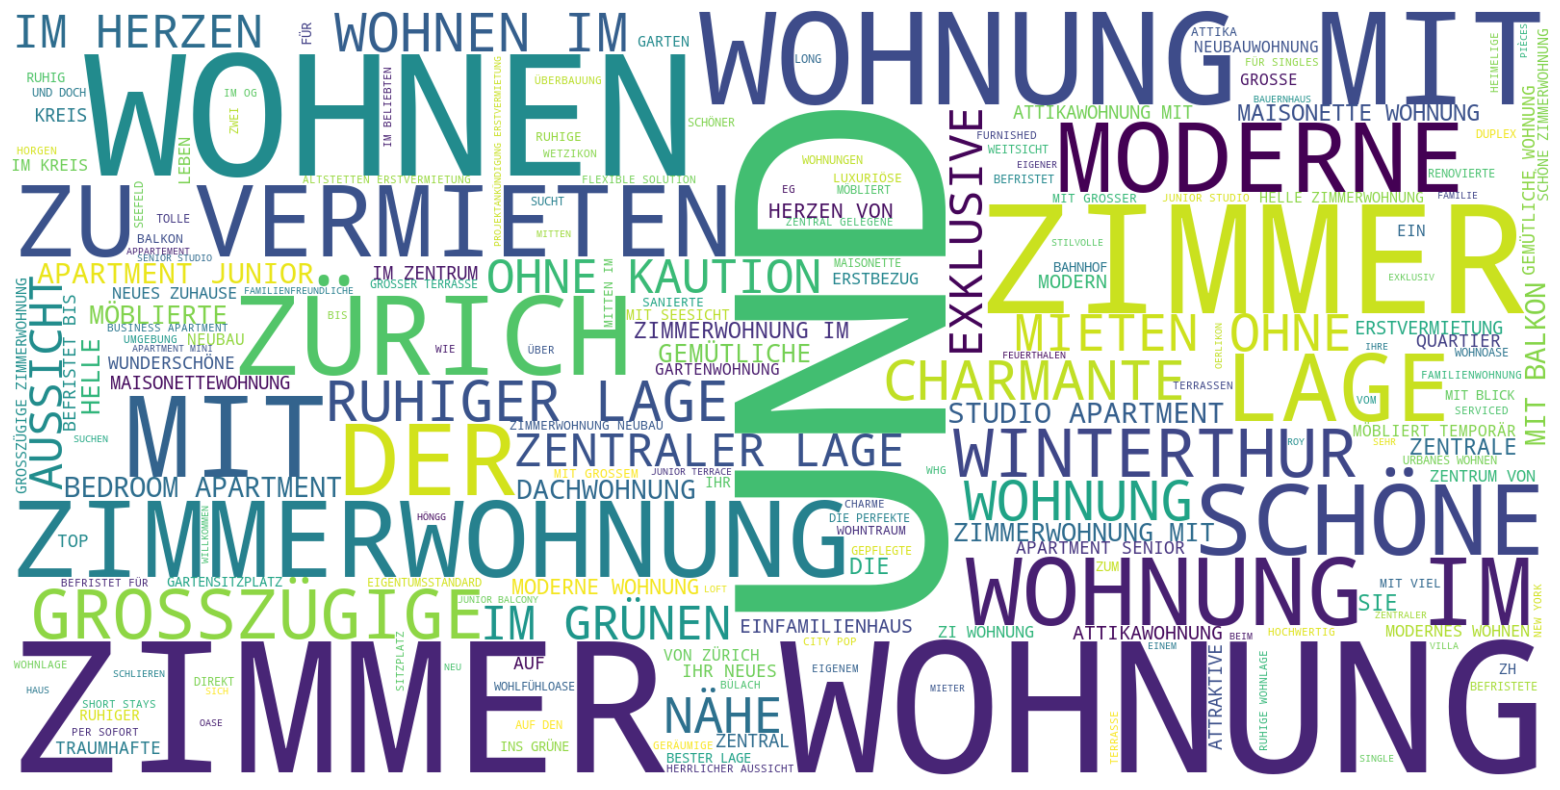

In [12]:
# Importiere notwendige Bibliotheken
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kombiniere alle Texte aus der Spalte 'description_raw' zu einem einzigen String
text = " ".join(description for description in df['description_raw'])

# Erstelle ein WordCloud-Objekt mit höherer Auflösung
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

# Visualisiere die Wortwolke
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Create new categorical variable based on apartment area

In [13]:
# Define classes (labels)
labels = ['0 - 49', '50 - 99', '100 - 500']

# Use the .cut method from pandas to divide the numeric values in classes
df["area_cat"] = pd.cut(df['area'], bins=[0, 50, 100, 10000], labels=labels)

# Show original data and classes
df[['area', 'area_cat']]

,area,area_cat
0,49.0,0 - 49
1,65.0,50 - 99
2,NaN,NaN
3,54.0,50 - 99
4,49.0,0 - 49
...,...,...
1003,82.0,50 - 99
1004,73.0,50 - 99
1005,110.0,100 - 500
1006,68.0,50 - 99


## 5.

In [14]:
# Define classes (labels)
labels = ['low', 'medium', 'high']


# Berechne den Median, das erste Quartil (Q1) und das dritte Quartil (Q3) der 'price'-Spalte
median_price = df['price'].median()
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)

# Ausgabe der Ergebnisse
print(f"Median: {median_price}")
print(f"1. Quartil (Q1): {q1_price}")
print(f"3. Quartil (Q3): {q3_price}")

# Use the .cut method from pandas to divide the numeric values in classes
df["price_per_m2"] = pd.cut(df['price'], bins=[0, 1900, 2500, 10000], labels=labels)

# Show original data and classes
df[['price', 'price_per_m2']]



Median: 2390.0
1. Quartil (Q1): 1849.0
3. Quartil (Q3): 3101.0


,price,price_per_m2
0,1441.0,low
1,1850.0,low
2,2686.0,high
3,4853.0,high
4,4335.0,high
...,...,...
1003,2830.0,high
1004,1713.0,low
1005,3500.0,high
1006,1650.0,low


### Create new numeric variable 'price_per_m2'

In [15]:
# Create the new variable
df['price_per_m2'] = round(df['price'] / df['area'], 2)

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2']]

,description_raw,rooms,area,price,luxurious,price_per_m2
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0,29.41
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0,28.46
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0,NaN
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0,89.87
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0,88.47
...,...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0,34.51
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0,23.47
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1,31.82
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0,24.26


### Including current datetime

In [16]:
# Get and format datetime
df['datetime'] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2', 'datetime']]

,description_raw,rooms,area,price,luxurious,price_per_m2,datetime
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0,29.41,2024-10-04 12:11:39
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0,28.46,2024-10-04 12:11:39
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0,NaN,2024-10-04 12:11:39
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0,89.87,2024-10-04 12:11:39
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0,88.47,2024-10-04 12:11:39
...,...,...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0,34.51,2024-10-04 12:11:39
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0,23.47,2024-10-04 12:11:39
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1,31.82,2024-10-04 12:11:39
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0,24.26,2024-10-04 12:11:39


## Count, identify and remove missing values

In [17]:
# Count missing values
print('Count missing values per variable')
print(pd.isna(df).sum(), '\n')

# Identify rows with missing values
print('Identify rows with missing values')
print(df.loc[df.isna().any(axis=1)][['rooms', 'area', 'price']], '\n')

# Drop rows where at least one element is missing.
df2 = df.dropna()
df2.head()

Count missing values per variable
web-scraper-order          0
web-scraper-start-url      0
rooms_area_price_raw       0
address_raw                0
price_raw                  0
description_raw            0
text_raw                   0
rooms                     45
area                     135
price                     15
description_raw_len        0
text_raw_len               0
luxurious                  0
furnished                  0
balcony                    0
central                    0
area_cat                 135
price_per_m2             143
datetime                   0
dtype: int64 

Identify rows with missing values
     rooms  area   price
2      NaN   NaN  2686.0
5      NaN   NaN  3205.0
6      NaN   NaN  3308.0
7      NaN   NaN  4241.0
8      NaN   NaN  2582.0
..     ...   ...     ...
929    3.5   NaN  1910.0
956    4.5   NaN  2000.0
957    6.5   NaN  3200.0
970    1.0   NaN  1350.0
993    3.5   NaN  3087.0

[143 rows x 3 columns] 



,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price,description_raw_len,text_raw_len,luxurious,furnished,balcony,central,area_cat,price_per_m2,datetime
0,1693998201-1,https://www.immoscout24.ch/de/immobilien/miete...,"3 Zimmer, 49 m², CHF 1441.—","Neuhusstrasse 6, 8630 Rüti ZH, ZH",CHF 1441.—,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,"3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 86...",3.0,49.0,1441.0,30,640,0,0,0,0,0 - 49,29.41,2024-10-04 12:11:39
1,1693998201-2,https://www.immoscout24.ch/de/immobilien/miete...,"3,5 Zimmer, 65 m², CHF 1850.—","Zürcherstrasse 1, 8173 Neerach, ZH",CHF 1850.—,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,"3,5 ZIMMER, 65 M², CHF 1850.—ZÜRCHERSTRASSE 1,...",3.5,65.0,1850.0,45,658,0,0,0,0,50 - 99,28.46,2024-10-04 12:11:39
3,1693998201-4,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 54 m², CHF 4853.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 4853.—,«2 BEDROOM APARTMENT SENIOR BALCONY»,"2 ZIMMER, 54 M², CHF 4853.—CRAMERSTRASSE 8-12,...",2.0,54.0,4853.0,36,695,0,0,0,0,50 - 99,89.87,2024-10-04 12:11:39
4,1693998201-5,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 49 m², CHF 4335.—","Rotachstrasse 33, 8003 Zürich, ZH",CHF 4335.—,«2 BEDROOM APARTMENT JUNIOR TERRACE»,"2 ZIMMER, 49 M², CHF 4335.—ROTACHSTRASSE 33, 8...",2.0,49.0,4335.0,36,693,0,0,0,0,0 - 49,88.47,2024-10-04 12:11:39
15,1693998201-16,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 32 m², CHF 3515.—","Wolframplatz 1, 8045 Zürich, ZH",CHF 3515.—,«2 BEDROOM APARTMENT MINI»,"2 ZIMMER, 32 M², CHF 3515.—WOLFRAMPLATZ 1, 804...",2.0,32.0,3515.0,26,681,0,0,0,0,0 - 49,109.84,2024-10-04 12:11:39


## Count, identify & remove duplicated values

In [18]:
# Count duplicated values in the whole data set
print('Sum of missing values:', df.duplicated().sum(), '\n')

# Identify duplicated values in 'rooms', 'area', 'price'
print('Duplicated values')
print(df.loc[df.duplicated(keep = 'last')])

# Drop the rows with duplicated values
df3 = df2.drop_duplicates()

Sum of missing values: 0 

Duplicated values
Empty DataFrame
Columns: [web-scraper-order, web-scraper-start-url, rooms_area_price_raw, address_raw, price_raw, description_raw, text_raw, rooms, area, price, description_raw_len, text_raw_len, luxurious, furnished, balcony, central, area_cat, price_per_m2, datetime]
Index: []


### Save data to file

In [19]:
df3.to_csv('apartments_data_prepared.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [20]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-04 12:11:39
Python Version: 3.11.10
-----------------------------------
